<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Авторы материала: преподаватели ФКН НИУ ВШЭ Соколов Евгений и Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# <center>Занятие 1. Библиотеки и инструменты для анализа данных. Математика в машинном обучении</center>
## <center>Практическое задание. Работа с данными опроса</center>

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 50)
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Посмотрим на данные опроса студентов ВШЭ, проходивших майнор "Интеллектуальный анализ данных" в 2016 году. Они были экспортированы в формат **.csv** (Comma-Separated Values). Документ .csv, как можно догадаться из расшифровки, представляет собой таблицу данных с разделенными запятыми компонентами. 

In [2]:
data = pd.read_csv("../../data/minor_poll_responses.csv")

Посмотрим на первые 5 анкет:

In [3]:
data.head(5)

,Timestamp,Фамилия Имя Отчество,E-mail адрес,Роль на курсе,Пол,Группа,Дата рождения,GPA (Средний балл),Родной город,Имели опыт анализа данных до курса?,Есть ли у вас научные публикации / доклады?,"Есть ли у вас публикации в ненаучных изданиях (журналы, тематические блоги и т.д.)? Перечислите издания через запятую.",Какой ваш уровень владения английским языком?,Как называется изучаемый на курсе предмет по-английски?,Какими языками программирования владеете?,Сколько будет 2+2?,После удержания налога на доходы Мария Константиновна получила 16530 рублей. Сколько рублей составляет заработная плата Марии Константиновны?,Сколько параметров имеет нормальное распределение?,"Какой статистический критерий примените для проверки различия между двумя связанными выборками, в случае, если нельзя сделать предположение о виде распределения выборки?",Сколько листьев имеет полное двоичное дерево высоты 3?,"Характеризуйте тремя предложениями, почему решили пойти на курс?",Какими социальными сетями пользуетесь?,Ссылка на личный вебсайт,Ссылка на профиль в LinkedIn,Ссылка на страницу в Facebook,Согласие на обработку данных,Факультет
0,1/11/2016 21:16:50,Шестаков Андрей Владимирович,shestakoffandrey@gmail.com,Семинарист,мужской,ИАД-3,5/17/1991,7.00,"г. Бор, Нижегородская область",да,есть какие-то,NaN,Upper-intermediate,Data Analysis,"Python, R, MATLAB, C/C++, Другие, кроме перечи...",100,14381.1,2.0,Критерий знаковых рангов Уилкоксона,8,For. The. Science!,"Facebook, VK.com (ВКонтакте), LinkedIn, Github...",NaN,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,Компьютерных Наук
1,1/11/2016 22:13:51,Кашницкий Юрий Савельевич,yury.kashnitsky@gmail.com,Семинарист,мужской,аспирант 3 года,11/1/1990,4.53,Москва,да,доклады на топовых конференциях по некоторой т...,Хабрахабр,Upper-intermediate,Data Analysis,"Python, R",4,19000,2.0,Критерий знаковых рангов Уилкоксона,8,Хочу получить опыт преподавания не только Pyth...,"Facebook, VK.com (ВКонтакте), LinkedIn, Github",http://www.hse.ru/staff/ykashnitsky,https://www.linkedin.com/profile/view?id=19224...,https://www.facebook.com/festline,Я заполнил форму полностью и даю согласие на о...,Факультет Компьютерных Наук
2,1/12/2016 9:28:50,Захарова Елена Сергеевна,1583253@gmail.com,Студент,женский,20,11/19/1996,NaN,Москва,нет,нет,NaN,Upper-intermediate,Data Mining,Python,4,NaN,NaN,Не знаю,"Не знаю, что такое двоичное дерево",Полезно. Для. Основной специальности.,"VK.com (ВКонтакте), Instagram",NaN,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,Гуманитарных наук/Лингвистика
3,1/12/2016 9:30:32,Михайлин Анатолий Владимирович,mehanat1996@gmail.com,Студент,мужской,13,5/26/1996,7.20,Москва,да,нет,Нет,Intermediate,Data Analysis,"Python, Java/C#",4,19000,2.0,Не знаю,"Не знаю, что такое двоичное дерево",Занимаюсь разработкой web-приложений (на языке...,VK.com (ВКонтакте),vk.com/mehanat,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,ГиМУ
4,1/12/2016 9:33:02,Мельник Анастасия Александровна,melnik-a-a@mail.ru,Студент,женский,20,8/3/2016,9.00,Москва,нет,нет,нет,Upper-intermediate,Data Mining,Python,4,NaN,2.0,Не знаю,8,"Я учусь на прикладной лингвистике, а в програм...","Facebook, VK.com (ВКонтакте), Instagram",https://vk.com/feed,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,Лингвистики


In [4]:
data.columns

Index([u'Timestamp', u'Фамилия Имя Отчество', u'E-mail адрес',
       u'Роль на курсе', u'Пол', u'Группа', u'Дата рождения',
       u'GPA (Средний балл)', u'Родной город',
       u'Имели опыт анализа данных до курса?',
       u'Есть ли у вас научные публикации / доклады?',
       u'Есть ли у вас публикации в ненаучных изданиях (журналы, тематические блоги и т.д.)? Перечислите издания через запятую.',
       u'Какой ваш уровень владения английским языком?',
       u'Как называется изучаемый на курсе предмет по-английски?',
       u'Какими языками программирования владеете?', u'Сколько будет 2+2?',
       u'После удержания налога на доходы Мария Константиновна получила 16530 рублей. Сколько рублей составляет заработная плата Марии Константиновны?',
       u'Сколько параметров имеет нормальное распределение?',
       u'Какой статистический критерий примените для проверки различия между двумя связанными выборками, в случае, если нельзя сделать предположение о виде распределения выборки?',


In [5]:
data.shape

(112, 27)

Индексом можно сделать и ФИО.

In [6]:
data.index = data["Фамилия Имя Отчество"]
data.ix["Соколов Евгений Андреевич"]

Timestamp                                                                                                                                                                                                    1/13/2016 0:24:41
Фамилия Имя Отчество                                                                                                                                                                                 Соколов Евгений Андреевич
E-mail адрес                                                                                                                                                                                             sokolov.evg@gmail.com
Роль на курсе                                                                                                                                                                                                           Лектор
Пол                                                                                                         

Таблица состоит из последовательностей типа Series, соответствующих её столбцам:

In [7]:
data['Timestamp']
data.Timestamp
type(data.Timestamp)

pandas.core.series.Series

Построим простую гистрограмму:

(8.473711340206187, 8.464851171361936)

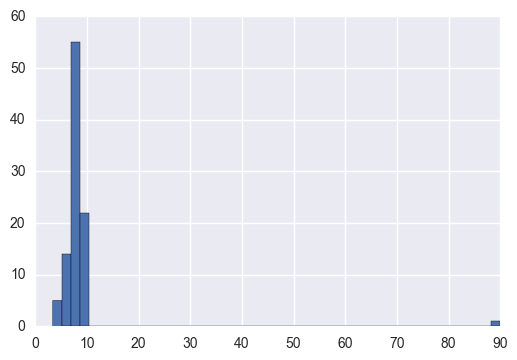

In [8]:
GPA = data['GPA (Средний балл)']
GPA.hist(bins=50);
GPA.mean(), GPA.std()

**Отсев выбросов**
С помощью простого приема с логической индексацией можно выкинуть аномальные данные:

1.3098221010517073

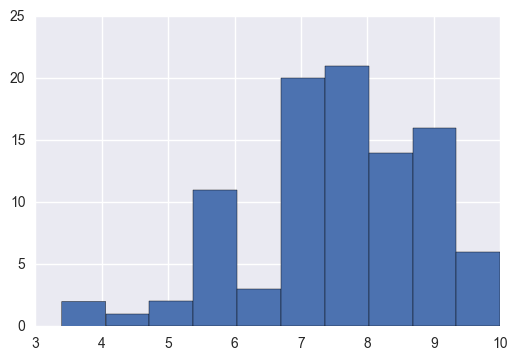

In [9]:
fixed_GPA_data = data[(data['GPA (Средний балл)'] <= 10) 
                      & (data['GPA (Средний балл)'] > 0)]
unusual_GPA_data = data[(data['GPA (Средний балл)'] > 10) | 
                        (data['GPA (Средний балл)'] < 3)]
fixed_GPA_data['GPA (Средний балл)'].hist()
fixed_GPA_data['GPA (Средний балл)'].mean(), 
fixed_GPA_data['GPA (Средний балл)'].std()

Проще:

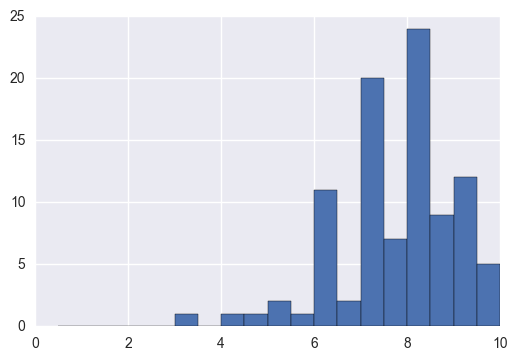

In [21]:
GPA.hist(bins=20, range=(0,10))

In [10]:
data["Сколько будет 2+2?"].value_counts()

4                                102
5                                  3
44                                 1
зависит от системы счисления       1
ровно 4                            1
100                                1
22                                 1
Name: Сколько будет 2+2?, dtype: int64

## Незаполненные данные

In [12]:
data.dropna(subset = ['Ссылка на личный вебсайт']).head()

,Timestamp,Фамилия Имя Отчество,E-mail адрес,Роль на курсе,Пол,Группа,Дата рождения,GPA (Средний балл),Родной город,Имели опыт анализа данных до курса?,Есть ли у вас научные публикации / доклады?,"Есть ли у вас публикации в ненаучных изданиях (журналы, тематические блоги и т.д.)? Перечислите издания через запятую.",Какой ваш уровень владения английским языком?,Как называется изучаемый на курсе предмет по-английски?,Какими языками программирования владеете?,Сколько будет 2+2?,После удержания налога на доходы Мария Константиновна получила 16530 рублей. Сколько рублей составляет заработная плата Марии Константиновны?,Сколько параметров имеет нормальное распределение?,"Какой статистический критерий примените для проверки различия между двумя связанными выборками, в случае, если нельзя сделать предположение о виде распределения выборки?",Сколько листьев имеет полное двоичное дерево высоты 3?,"Характеризуйте тремя предложениями, почему решили пойти на курс?",Какими социальными сетями пользуетесь?,Ссылка на личный вебсайт,Ссылка на профиль в LinkedIn,Ссылка на страницу в Facebook,Согласие на обработку данных,Факультет
Фамилия Имя Отчество,,,,,,,,,,,,,,,,,,,,,,,,,,,
Кашницкий Юрий Савельевич,1/11/2016 22:13:51,Кашницкий Юрий Савельевич,yury.kashnitsky@gmail.com,Семинарист,мужской,аспирант 3 года,11/1/1990,4.53,Москва,да,доклады на топовых конференциях по некоторой т...,Хабрахабр,Upper-intermediate,Data Analysis,"Python, R",4,19000,2.0,Критерий знаковых рангов Уилкоксона,8,Хочу получить опыт преподавания не только Pyth...,"Facebook, VK.com (ВКонтакте), LinkedIn, Github",http://www.hse.ru/staff/ykashnitsky,https://www.linkedin.com/profile/view?id=19224...,https://www.facebook.com/festline,Я заполнил форму полностью и даю согласие на о...,Факультет Компьютерных Наук
Михайлин Анатолий Владимирович,1/12/2016 9:30:32,Михайлин Анатолий Владимирович,mehanat1996@gmail.com,Студент,мужской,13,5/26/1996,7.20,Москва,да,нет,Нет,Intermediate,Data Analysis,"Python, Java/C#",4,19000,2.0,Не знаю,"Не знаю, что такое двоичное дерево",Занимаюсь разработкой web-приложений (на языке...,VK.com (ВКонтакте),vk.com/mehanat,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,ГиМУ
Мельник Анастасия Александровна,1/12/2016 9:33:02,Мельник Анастасия Александровна,melnik-a-a@mail.ru,Студент,женский,20,8/3/2016,9.00,Москва,нет,нет,нет,Upper-intermediate,Data Mining,Python,4,NaN,2.0,Не знаю,8,"Я учусь на прикладной лингвистике, а в програм...","Facebook, VK.com (ВКонтакте), Instagram",https://vk.com/feed,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,Лингвистики
Палладичев Сергей Сергеевич,1/12/2016 9:35:49,Палладичев Сергей Сергеевич,palladichev@yandex.ru,Студент,мужской,13,6/9/1996,7.00,Орел,нет,есть какие-то,NaN,Intermediate,Data Mining,Python,4,16530,2.0,Критерий Стьюдента для связанных выборок,8,"Интерес, проявляемый к курсу",VK.com (ВКонтакте),https://vk.com/id249873579,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,Логистики
Зеленкова Валерия Игоревна,1/12/2016 9:36:13,Зеленкова Валерия Игоревна,lerie483@gmail.com,Студент,женский,20,10/23/1996,9.00,Смоленск,нет,нет,NaN,Upper-intermediate,Data Mining,Python,4,"18678,9",2.0,Не знаю,8,1) Хочу улучшить навыки программирования. 2) И...,"Facebook, VK.com (ВКонтакте), Github, Twitter,...",vk.com/lerie,NaN,NaN,Я заполнил форму полностью и даю согласие на о...,"Факультет гуманитарных наук, Школа лингвистики"


**Преобразование столбцов**

Для "причесывания" данных оказываются незаменимы методы map() и apply(). 

In [13]:
#data.Timestamp.map?
#data.Timestamp.apply?

Воспользуемся ответам на вопрос о налогообложении для примера

In [14]:
data = data.rename(columns = {"После удержания налога на доходы Мария Константиновна \
получила 16530 рублей. Сколько рублей составляет заработная плата Марии Константиновны?" : 
                              "tax_question"})

Изначально ответы были таковы:

In [15]:
data.tax_question.value_counts()

19000                                                       73
16530                                                        6
18679                                                        2
23614                                                        1
18678                                                        1
=\                                                           1
19447                                                        1
127,153,846                                                  1
Больше 16530                                                 1
Строго говоря, нет информации о системе налогообложения      1
более 16530 рублей                                           1
18 793, 1034                                                 1
18678,9                                                      1
15539                                                        1
14381.1                                                      1
19000 gross, 16530 net                                 

Пример с функцией:

In [16]:
def clean(string):
    try:
        return float(string)
    except:
        return None

data.tax_question = data.tax_question.apply(clean)
data.tax_question.head()

Фамилия Имя Отчество
Шестаков Андрей Владимирович       14381.1
Кашницкий Юрий Савельевич          19000.0
Захарова Елена Сергеевна               NaN
Михайлин Анатолий Владимирович     19000.0
Мельник Анастасия Александровна        NaN
Name: tax_question, dtype: float64

Пример со словарём:

In [17]:
# костыль с созданием лишнего Series - так нормально выводится список строк на русском
pd.Series(data["Сколько будет 2+2?"].unique())

0                              100
1                                4
2                                5
3                          ровно 4
4                               22
5                              NaN
6    зависит от системы счисления 
7                               44
dtype: object

In [18]:
dict = {'4' : 'Ответил', 
        '100' : 'Не ответил',
        '5' : 'Не ответил', 
        'ровно 4' : 'Ответил', 
        '22' : 'Не ответил', 
        'зависит от системы счисления ' : 'Не ответил', 
        '44' : 'Не ответил'}
data["Сколько будет 2+2?"].map(dict).head()

Фамилия Имя Отчество
Шестаков Андрей Владимирович       Не ответил
Кашницкий Юрий Савельевич             Ответил
Захарова Елена Сергеевна              Ответил
Михайлин Анатолий Владимирович        Ответил
Мельник Анастасия Александровна       Ответил
Name: Сколько будет 2+2?, dtype: object

Для работы со временем может пригодиться тип [**datetime**](https://docs.python.org/3/library/datetime.html)

In [19]:
from datetime import datetime

data["Timestamp"].map(lambda t: 
                      datetime.strptime(t, "%m/%d/%Y %H:%M:%S").date()).head()

Фамилия Имя Отчество
Шестаков Андрей Владимирович       2016-01-11
Кашницкий Юрий Савельевич          2016-01-11
Захарова Елена Сергеевна           2016-01-12
Михайлин Анатолий Владимирович     2016-01-12
Мельник Анастасия Александровна    2016-01-12
Name: Timestamp, dtype: object

Теперь можно сохранить преобразованный Dataframe:

In [20]:
data.to_csv("../../data/transformed_poll_data.csv")

**1. Выпишите e-mail людей, правильно ответивших на вопрос о статистических критериях**

In [ ]:
# Ваш код здесь

**2. Найдите всех своих тёзок на курсе**

In [ ]:
# Ваш код здесь

**3. Постройте гистограмму для ответов о количестве параметров нормального распределения. Распределены ли ответы нормально?**

In [ ]:
# Ваш код здесь

**4. Выпишите медианный GPA студентов в зависимости от уровня владения английским языком. Можно воспользоваться методом groupby(). Дополнительно - нарисовать картинку.**

In [ ]:
# Ваш код здесь

**5. Составьте список всех людей с ФКН, которые правильно ответили на вопрос о количестве вершин в двоичном дереве. Выпишите указанные ими профили в facebook.**

In [ ]:
# Ваш код здесь

**6. Известно, что с достаточно большой вероятностью среди 40 людей найдется пара человек, у которых совпадает день рождения. Есть ли такие на курсе?**

In [ ]:
# Ваш код здесь